## Obróbka statystyczna czasów wykonania funkcji matematycznych

In [13]:
using LinearAlgebra,Statistics,Measures,DataFrames,CSV,Plots
df = DataFrame(Size=Int[],Scalar=Float64[],Matrix=Float64[])

,Size,Scalar,Matrix
,Int64,Float64,Float64


In [14]:
for length = 2:10:200
    for i = 1:12
        first = rand(0:9,length)
        second = rand(0:9,length)
        matrix = rand(0:9,(length,length))
        time1 = @timed dot(first,second)
        time2 = @timed matrix * first
        if i > 1
            push!(df,(length, time1.time,time2.time))
        end
    end
end

In [15]:
df

,Size,Scalar,Matrix
,Int64,Float64,Float64
1,2,5.1e-8,1.12e-7
2,2,4.7e-8,1.18e-7
3,2,4.2e-8,1.15e-7
4,2,4.3e-8,2.02e-7
5,2,4.3e-8,1.07e-7
6,2,4.1e-8,1.13e-7
7,2,4.4e-8,1.12e-7
8,2,4.3e-8,1.08e-7
9,2,4.2e-8,1.05e-7


In [16]:
CSV.write("df1.csv",df)

"df1.csv"

In [17]:
df2 = combine(groupby(df,:Size),:Scalar => mean => :mean_scalar,:Scalar => std => :sd_scalar, :Matrix => mean => :mean_matrix, :Matrix => std => :sd_matrix)

,Size,mean_scalar,sd_scalar,mean_matrix,sd_matrix
,Int64,Float64,Float64,Float64,Float64
1,2,4.39091e-8,2.80908e-9,1.20364e-7,2.73835e-8
2,12,5.50909e-8,3.0481e-9,2.51364e-7,8.33394e-9
3,22,6.77273e-8,3.66308e-9,4.52091e-7,1.05717e-7
4,32,9.50909e-8,9.64836e-9,6.70455e-7,3.17533e-8
5,42,1.06545e-7,1.01623e-8,1.14645e-6,5.00807e-8
6,52,1.21455e-7,7.35342e-9,1.436e-6,6.55607e-8
7,62,1.39818e-7,1.06002e-8,2.31264e-6,4.65043e-8
8,72,1.45455e-7,2.55866e-8,2.91655e-6,1.08402e-7
9,82,1.53e-7,1.47241e-8,3.52391e-6,1.61212e-7


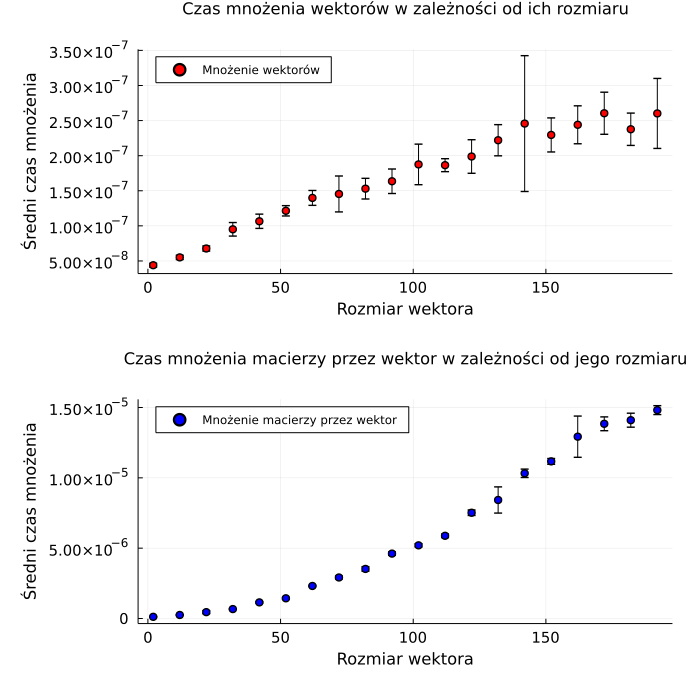

In [18]:
scatter(df2.Size, size = (700, 700), margin=5mm,xtickfontsize=10, ytickfontsize=10, titlefontsize = 11,xlabel = "Rozmiar wektora",ylabel = "Średni czas mnożenia",[df2.mean_scalar,df2.mean_matrix], title = ["Czas mnożenia wektorów w zależności od ich rozmiaru" "Czas mnożenia macierzy przez wektor w zależności od jego rozmiaru"], legend_position = :topleft, label = ["Mnożenie wektorów" "Mnożenie macierzy przez wektor"], color = [:red :blue],yerr = [df2.sd_scalar df2.sd_matrix], layout = grid(2,1,heights=[0.5,0.5]))